# Generating 2 normal distributions with a given correlation
##### Author: Guillaume Guy
##### Date: 2020/10/25

###### Implementation of Joseph K's answer: https://math.stackexchange.com/questions/446093/generate-correlated-normal-random-variables

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def print_charact(x):
    print("mean",np.mean(x))
    print("std",np.std(x))
    return

In [90]:
_N = 1000 # the desired sample size
_corr = 0.5 # the desired correlation

# generate random normal distribution
a = np.reshape(np.random.normal(0,1,_N),(_N,-1))
b = np.reshape(np.random.normal(0,1,_N),(_N,-1))


# Compute 
all_norm = np.concatenate([a,b],axis=1)
cov = np.array([[1,_corr],[_corr,1]])
C = np.linalg.cholesky(cov)

Y = np.transpose(0 + np.dot(C,np.transpose(all_norm) ))

print("correlation:\n",np.corrcoef(Y[:,0],Y[:,1]))

correlation:
 [[1.         0.48182428]
 [0.48182428 1.        ]]


In [101]:
for i in range(2):
    print(i)
    print_charact(Y[:,i])

0
mean -0.00030348914592111953
std 0.9857752200867022
1
mean -0.010099105330127443
std 0.9628368698264628


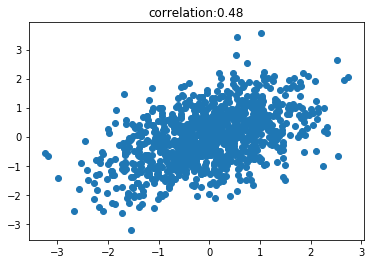

In [102]:
plt.scatter(x=Y[:,0],y=Y[:,1])
plt.title("correlation:" + str(np.round(np.corrcoef(Y[:,0],Y[:,1])[1,0],2)))
plt.show()